## Importing Necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from statistics import mode
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport

In [7]:
#Importing Data
df = pd.read_excel("Data_Train.xlsx")      
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [8]:
#DATA = pd.read_excel('D')

In [9]:
#checking datatypes
df.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey)

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [11]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [12]:
df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year

In [13]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  Day  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   24   
1    05:50         13:15   7h 25m     2 stops         No info   7662    5   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882    6   
3    18:05         23:30   5h 25m      1 stop         No info   6218    5   
4    16:50         21:35   4h 45m      1 stop         No info  13302    3   

   Month  Year  
0      3  2019  
1      1  2019  
2      9  2019  
3     12  2019  
4      1  2019

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Day              10683 non-null  int64         
 12  Month            10683 non-null  int64         
 13  Year             10683 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object

In [15]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [16]:
df.Dep_Time.isnull().sum()

0

In [17]:
df['Dep_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_minute'] = df['Dep_Time'].str.split(':').str[1]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  Dep_hour         10683 non-null  object
 14  Dep_minute       10683 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.2+ MB


In [19]:
df.drop('Dep_Time',axis=1,inplace=True)

In [20]:
df.head(1)

Airline    Source Destination      Route  Arrival_Time Duration Total_Stops  \
0  IndiGo  Banglore   New Delhi  BLR → DEL  01:10 22 Mar   2h 50m    non-stop   

  Additional_Info  Price  Day  Month  Year Dep_hour Dep_minute  
0         No info   3897   24      3  2019       22         20

In [21]:
df['Dep_hour']=df.Dep_hour.astype(int)
df['Dep_minute']=df.Dep_minute.astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Dep_hour         10683 non-null  int64 
 13  Dep_minute       10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


In [23]:
df['Duration'].isnull().sum()

0

In [24]:
df['Duration_hour'] = df['Duration'].str.split('h').str[0]

In [25]:
df['Duration_minute'] = df['Duration'].str.split(' ').str[1]
df['Duration_minute'] = df['Duration_minute'].str.split('m').str[0]

In [26]:
df.head()

Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  Day  Month  Year  Dep_hour  \
0   2h 50m    non-stop         No info   3897   24      3  2019        22   
1   7h 25m     2 stops         No info   7662    5      1  2019         5   
2      19h     2 stops         No info  13882    6      9  2019         9   
3   5h 25m      1 stop         No info   6218    5     12  2019        18   
4   4h 45m      1 stop         No info  13302    3      1  2019        16   

   Dep_minute Duration_hour Duration_minute  
0          20             2              50  
1          50             7              25  
2          25            19             NaN  
3           5             5              25  
4          50             4              45

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Dep_hour         10683 non-null  int64 
 13  Dep_minute       10683 non-null  int64 
 14  Duration_hour    10683 non-null  object
 15  Duration_minute  9651 non-null   object
dtypes: int64(6), object(10)
memory usage: 1.3+ MB


In [28]:
df.Duration_hour = df.Duration_hour.astype(int)

ValueError: ignored

In [29]:
df[df['Duration_hour']=='5m']

Airline  Source Destination                  Route Arrival_Time  \
6474  Air India  Mumbai   Hyderabad  BOM → GOI → PNQ → HYD        16:55   

     Duration Total_Stops Additional_Info  Price  Day  Month  Year  Dep_hour  \
6474       5m     2 stops         No info  17327    3      6  2019        16   

      Dep_minute Duration_hour Duration_minute  
6474          50            5m             NaN

In [30]:
df.drop(6474,axis=0,inplace=True)

In [31]:
df[df['Duration_hour']=='5m']

Empty DataFrame
Columns: [Airline, Source, Destination, Route, Arrival_Time, Duration, Total_Stops, Additional_Info, Price, Day, Month, Year, Dep_hour, Dep_minute, Duration_hour, Duration_minute]
Index: []

In [32]:
df.Duration_minute = df.Duration_minute.fillna(0)

In [33]:
df.Duration_hour = df.Duration_hour.astype(int)
df.Duration_minute = df.Duration_minute.astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10681 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10681 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Day              10682 non-null  int64 
 10  Month            10682 non-null  int64 
 11  Year             10682 non-null  int64 
 12  Dep_hour         10682 non-null  int64 
 13  Dep_minute       10682 non-null  int64 
 14  Duration_hour    10682 non-null  int64 
 15  Duration_minute  10682 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.4+ MB


In [35]:
df.drop('Duration',axis = 1, inplace=True)

In [36]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [37]:
df[df.Total_Stops.isnull()]

Airline Source Destination Route  Arrival_Time Total_Stops  \
9039  Air India  Delhi      Cochin   NaN  09:25 07 May         NaN   

     Additional_Info  Price  Day  Month  Year  Dep_hour  Dep_minute  \
9039         No info   7480    5      6  2019         9          45   

      Duration_hour  Duration_minute  
9039             23               40

In [38]:
df.drop(9039,axis=0,inplace=True)

In [39]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [40]:
df['Total_Stops'] = df.Total_Stops.map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [41]:
df['Additional_Info'].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [42]:
df[df.Additional_Info=='Red-eye flight']

Airline    Source Destination      Route  Arrival_Time  Total_Stops  \
8122  Air Asia  Banglore   New Delhi  BLR → DEL  02:10 02 Mar            0   

     Additional_Info  Price  Day  Month  Year  Dep_hour  Dep_minute  \
8122  Red-eye flight  10873    3      1  2019        23          25   

      Duration_hour  Duration_minute  
8122              2               45

In [43]:
df[df.Additional_Info=='Business class']

Airline    Source Destination            Route  \
2924   Jet Airways Business  Banglore   New Delhi  BLR → BOM → DEL   
3032            Jet Airways  Banglore   New Delhi  BLR → BDQ → DEL   
5372   Jet Airways Business  Banglore   New Delhi  BLR → BOM → DEL   
10364  Jet Airways Business  Banglore   New Delhi  BLR → MAA → DEL   

      Arrival_Time  Total_Stops Additional_Info  Price  Day  Month  Year  \
2924         11:25            1  Business class  79512    3      1  2019   
3032         12:20            1  Business class  28097    3      1  2019   
5372         12:25            1  Business class  62427    3      1  2019   
10364        14:25            1  Business class  57209    3      1  2019   

       Dep_hour  Dep_minute  Duration_hour  Duration_minute  
2924          5          45              5               40  
3032          5          50              6               30  
5372          5          45              6               40  
10364         9          45              4               40

In [44]:
df.drop([2924,3032,5372,10364],axis=0,inplace=True)

In [45]:
df.drop(8122,axis=0,inplace=True)

In [46]:
df[df.Additional_Info=='1 Short layover']

Airline    Source Destination                  Route Arrival_Time  \
785  Air India  Banglore   New Delhi  BLR → BOM → BHO → DEL        23:25   

     Total_Stops  Additional_Info  Price  Day  Month  Year  Dep_hour  \
785            2  1 Short layover  26743    3      1  2019         8   

     Dep_minute  Duration_hour  Duration_minute  
785          50             14               35

In [47]:
df.drop(785,axis=0,inplace=True)

In [48]:
df[df.Additional_Info=='2 Long layover']

Airline    Source Destination                  Route  Arrival_Time  \
10511  Air India  Banglore   New Delhi  BLR → BOM → BHO → DEL  09:25 02 Mar   

       Total_Stops Additional_Info  Price  Day  Month  Year  Dep_hour  \
10511            2  2 Long layover  26480    3      1  2019         6   

       Dep_minute  Duration_hour  Duration_minute  
10511          45             26               40

In [49]:
df.drop(10511,axis=0,inplace=True)

In [50]:
df[df.Additional_Info=='Change airports']

Airline    Source Destination                              Route  \
1712   Air India  Banglore   New Delhi              BLR → CCU → GAU → DEL   
2883   Air India  Banglore   New Delhi                    BLR → COK → DEL   
3535   Air India  Banglore   New Delhi                    BLR → MAA → DEL   
8897   Air India  Banglore   New Delhi              BLR → CCU → GAU → DEL   
9182   Air India  Banglore   New Delhi  BLR → CCU → BBI → HYD → VGA → DEL   
9479   Air India  Banglore   New Delhi              BLR → CCU → BBI → DEL   
10149  Air India  Banglore   New Delhi              BLR → VGA → VTZ → DEL   

       Arrival_Time  Total_Stops  Additional_Info  Price  Day  Month  Year  \
1712          22:10            2  Change airports  13366    3      1  2019   
2883   23:20 02 Mar            1  Change airports  14305    3      1  2019   
3535          23:55            1  Change airports  26092    3      1  2019   
8897          22:10            2  Change airports  13576    3      1  2019   
9182   11:20 02 Mar            4  Change airports  17686    3      1  2019   
9479          16:20            2  Change airports  15119    3      1  2019   
10149         17:45            2  Change airports  17461    3      1  2019   

       Dep_hour  Dep_minute  Duration_hour  Duration_minute  
1712          5          50             16               20  
2883         22           0             25               20  
3535         11          50             12                5  
8897         11           5             11                5  
9182          5          50             29               30  
9479          5          50             10               30  
10149        10          30              7               15

In [51]:
df.drop([10149,9479,9182,8897,3535,2883,1712],axis=0,inplace=True)

In [52]:
df[df.Additional_Info=='1 Long layover']

Airline    Source Destination            Route  Arrival_Time  \
1043    Air India  Banglore   New Delhi  BLR → CCU → DEL         19:50   
2079    Air India  Banglore   New Delhi  BLR → AMD → DEL         20:30   
2405  Jet Airways  Banglore   New Delhi  BLR → BOM → DEL  07:40 02 Mar   
2481    Air India  Banglore   New Delhi  BLR → AMD → DEL         23:55   
2495  Jet Airways  Banglore   New Delhi  BLR → BOM → DEL  07:40 02 Mar   
2556  Jet Airways  Banglore   New Delhi  BLR → BOM → DEL  10:25 02 Mar   
3111  Jet Airways  Banglore   New Delhi  BLR → BOM → DEL         21:20   
3700  Jet Airways  Banglore   New Delhi  BLR → BOM → DEL  09:30 02 Mar   
3788    Air India  Banglore   New Delhi  BLR → MAA → DEL  13:00 02 Mar   
4521  Jet Airways  Banglore   New Delhi  BLR → BOM → DEL  09:00 02 Mar   
5013  Jet Airways  Banglore   New Delhi  BLR → BOM → DEL  10:25 02 Mar   
5628  Jet Airways     Delhi      Cochin  DEL → BOM → COK         19:00   
6024    Air India  Banglore   New Delhi  BLR → MAA → DEL  08:55 02 Mar   
6336     SpiceJet  Banglore   New Delhi  BLR → HYD → DEL         23:40   
6576  Jet Airways  Banglore   New Delhi  BLR → BOM → DEL  09:30 02 Mar   
7724  Jet Airways  Banglore   New Delhi  BLR → BOM → DEL         21:20   
8957  Jet Airways  Banglore   New Delhi  BLR → BOM → DEL  05:05 02 Mar   
9019  Jet Airways  Banglore   New Delhi  BLR → BOM → DEL  11:25 02 Mar   
9657    Air India  Banglore   New Delhi  BLR → HYD → DEL  08:50 02 Mar   

      Total_Stops Additional_Info  Price  Day  Month  Year  Dep_hour  \
1043            1  1 Long layover  14594    3      1  2019        11   
2079            1  1 Long layover  14752    3      1  2019         0   
2405            1  1 Long layover  22270    3      1  2019        14   
2481            1  1 Long layover  12599    3      1  2019         0   
2495            1  1 Long layover  26890    3      1  2019        16   
2556            1  1 Long layover  25735    3      1  2019        16   
3111            1  1 Long layover  27992    3      1  2019        11   
3700            1  1 Long layover  31825    3      1  2019        22   
3788            1  1 Long layover  15434    3      1  2019        11   
4521            1  1 Long layover  25735    3      1  2019        16   
5013            1  1 Long layover  31825    3      1  2019        22   
5628            1  1 Long layover  18581   24      6  2019         8   
6024            1  1 Long layover  14594    3      1  2019        11   
6336            1  1 Long layover   7744    3      1  2019        15   
6576            1  1 Long layover  31825    3      1  2019        18   
7724            1  1 Long layover  27992    3      1  2019         8   
8957            1  1 Long layover  26890    3      1  2019         8   
9019            1  1 Long layover  31825    3      1  2019        22   
9657            1  1 Long layover  10981    3      1  2019        17   

      Dep_minute  Duration_hour  Duration_minute  
1043           5              8               45  
2079          30             20                0  
2405           5             17               35  
2481          30             23               25  
2495          55             14               45  
2556          55             17               30  
3111          40              9               40  
3700          50             10               40  
3788          50             25               10  
4521          55             16                5  
5013          50             11               35  
5628           0             11                0  
6024          50             21                5  
6336          35              8                5  
6576          40             14               50  
7724          55             12               25  
8957          55             20               10  
9019          50             12               35  
9657           0             15               50

In [53]:
df.drop([1043,1034,9657,9019,8957,7724,6576,6336,6024,5628,5013,4521,3788,3700,3111,2556,2495,2481,2405,2079],axis=0,inplace=True)

In [54]:
df['Additional_Info'].value_counts()

No info                         8342
In-flight meal not included     1982
No check-in baggage included     320
No Info                            3
Name: Additional_Info, dtype: int64

In [55]:
df.drop('Additional_Info',axis=1,inplace=True)

In [56]:
df.drop(['Route','Arrival_Time'],axis=1,inplace=True)

In [57]:
df.head(1)

Airline    Source Destination  Total_Stops  Price  Day  Month  Year  \
0  IndiGo  Banglore   New Delhi            0   3897   24      3  2019   

   Dep_hour  Dep_minute  Duration_hour  Duration_minute  
0        22          20              2               50

In [58]:
data = df.copy()

In [59]:
data.head(1)

Airline    Source Destination  Total_Stops  Price  Day  Month  Year  \
0  IndiGo  Banglore   New Delhi            0   3897   24      3  2019   

   Dep_hour  Dep_minute  Duration_hour  Duration_minute  
0        22          20              2               50

In [60]:
data.drop(['Source','Destination'],axis=1,inplace=True)

In [61]:
data.head(1)

Airline  Total_Stops  Price  Day  Month  Year  Dep_hour  Dep_minute  \
0  IndiGo            0   3897   24      3  2019        22          20   

   Duration_hour  Duration_minute  
0              2               50

<Axes: >

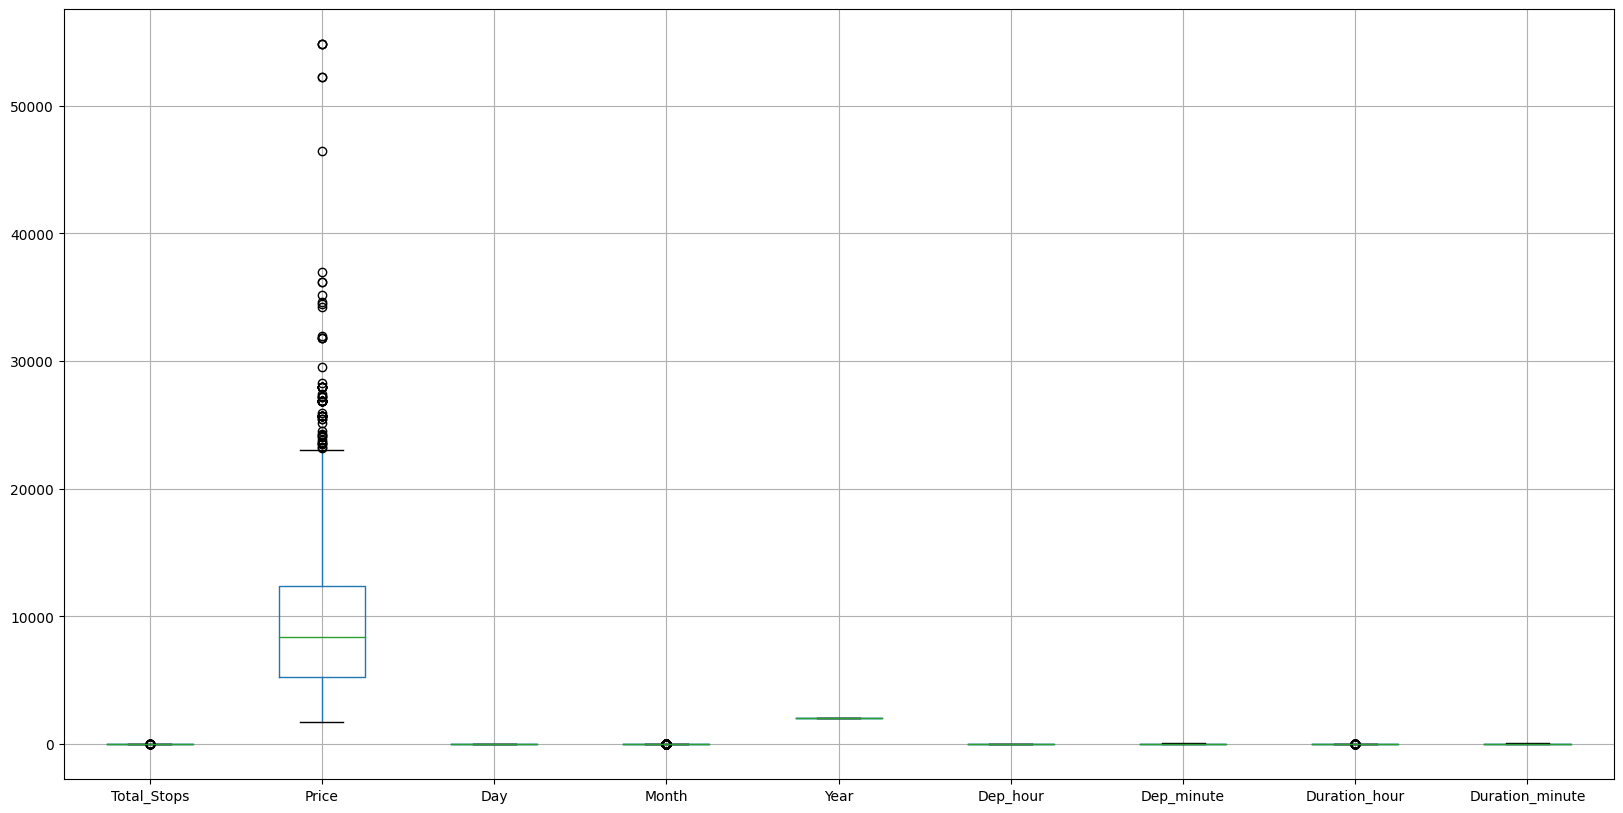

In [62]:
data.boxplot(figsize=(20,10))

In [63]:
data[data.Price>40000]

Airline  Total_Stops  Price  Day  Month  Year  Dep_hour  \
657   Jet Airways Business            1  52229    3      1  2019         5   
1478           Jet Airways            1  54826   18      3  2019        18   
2618           Jet Airways            1  54826   18      3  2019        22   
5439           Jet Airways            1  54826    3      1  2019        16   
7351  Jet Airways Business            2  46490    3      3  2019        20   
9715  Jet Airways Business            2  52285    3      6  2019        20   

      Dep_minute  Duration_hour  Duration_minute  
657           45              5                0  
1478          40              6                5  
2618          50              6               15  
5439          55              6                5  
7351           5              8               20  
9715           5              8               20

In [64]:
#Outlier using IQR test
def outliers_IQR_test(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR = q3-q1
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    outliers=[]
    for i in data:
        if i<=lower or i>=upper:
            outliers.append(i)
    return outliers

outliers_list = outliers_IQR_test(data.Price)
len(outliers_list)

77

In [65]:
outliers_list

[27430,
 36983,
 26890,
 26890,
 25139,
 27210,
 52229,
 26890,
 25735,
 27992,
 26890,
 26890,
 23583,
 26890,
 23533,
 24115,
 25735,
 54826,
 31783,
 27992,
 26890,
 26890,
 25430,
 36235,
 27210,
 54826,
 26890,
 35185,
 26890,
 25735,
 25913,
 27992,
 23267,
 54826,
 31825,
 25430,
 26890,
 36235,
 23843,
 26890,
 25735,
 28322,
 25735,
 25735,
 26890,
 27992,
 34273,
 46490,
 29528,
 26890,
 26890,
 26890,
 34503,
 26890,
 26890,
 26890,
 23170,
 24528,
 26890,
 27992,
 25735,
 34608,
 25703,
 23528,
 27282,
 25735,
 27992,
 52285,
 24017,
 31945,
 26890,
 24318,
 23677,
 27992,
 24210,
 26890,
 31825]

In [66]:
data['Airline'].value_counts()

Jet Airways                          3836
IndiGo                               2053
Air India                            1735
Multiple carriers                    1196
SpiceJet                              816
Vistara                               479
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Jet Airways Business                    3
Trujet                                  1
Name: Airline, dtype: int64

In [67]:
data[data.Airline=='Trujet']

Airline  Total_Stops  Price  Day  Month  Year  Dep_hour  Dep_minute  \
2878  Trujet            1   4140    3      6  2019        13           5   

      Duration_hour  Duration_minute  
2878              3               15

In [68]:
data.drop(2878,axis=0,inplace=True)

In [69]:
data[data.Airline=='Jet Airways Business']

Airline  Total_Stops  Price  Day  Month  Year  Dep_hour  \
657   Jet Airways Business            1  52229    3      1  2019         5   
7351  Jet Airways Business            2  46490    3      3  2019        20   
9715  Jet Airways Business            2  52285    3      6  2019        20   

      Dep_minute  Duration_hour  Duration_minute  
657           45              5                0  
7351           5              8               20  
9715           5              8               20

In [70]:
data.drop([657,7351,9715],axis=0,inplace=True)

In [71]:
data[data.Airline=='Vistara Premium economy']

Airline  Total_Stops  Price  Day  Month  Year  Dep_hour  \
426   Vistara Premium economy            0  11793    3      3  2019        16   
7657  Vistara Premium economy            0   9125    3      1  2019         7   
8615  Vistara Premium economy            0   5969    4      6  2019        11   

      Dep_minute  Duration_hour  Duration_minute  
426            0              2               35  
7657           5              2               15  
8615          30              2               50

In [72]:
data.drop([426,7657,8615],axis=0,inplace=True)

In [73]:
data[data.Airline=='Multiple carriers Premium economy']

Airline  Total_Stops  Price  Day  Month  Year  \
717   Multiple carriers Premium economy            1  10161   21      3  2019   
1799  Multiple carriers Premium economy            1   9845   21      3  2019   
4627  Multiple carriers Premium economy            1  10161   21      3  2019   
4718  Multiple carriers Premium economy            1   9845   21      3  2019   
5090  Multiple carriers Premium economy            1  11269   21      3  2019   
5489  Multiple carriers Premium economy            1  11269   21      3  2019   
5673  Multiple carriers Premium economy            1  14629   21      3  2019   
5836  Multiple carriers Premium economy            1  14629   21      3  2019   
6470  Multiple carriers Premium economy            1   9845   21      3  2019   
6591  Multiple carriers Premium economy            1  11269   21      3  2019   
6601  Multiple carriers Premium economy            1  13369   21      3  2019   
9249  Multiple carriers Premium economy            1  10885   21      3  2019   
9253  Multiple carriers Premium economy            1  11269   21      3  2019   

      Dep_hour  Dep_minute  Duration_hour  Duration_minute  
717          7          30             11               45  
1799         7          30             13               30  
4627         8          55             10               20  
4718         6           0             15                0  
5090         6           0              7               20  
5489         6           0              9               30  
5673         6           0             12               50  
5836         7          30             11               20  
6470         8          55             12                5  
6591         8          55              6               35  
6601         6           0              6               35  
9249        19           0              6               35  
9253         7          30              8                0

In [74]:
data.drop([717,1799,4627,4718,5090,5489,5673,5836,6470,6591,6601,9249,9253],axis=0,inplace=True)

In [75]:
data['Airline'].value_counts()

Jet Airways          3836
IndiGo               2053
Air India            1735
Multiple carriers    1196
SpiceJet              816
Vistara               479
Air Asia              318
GoAir                 194
Name: Airline, dtype: int64

<Axes: >

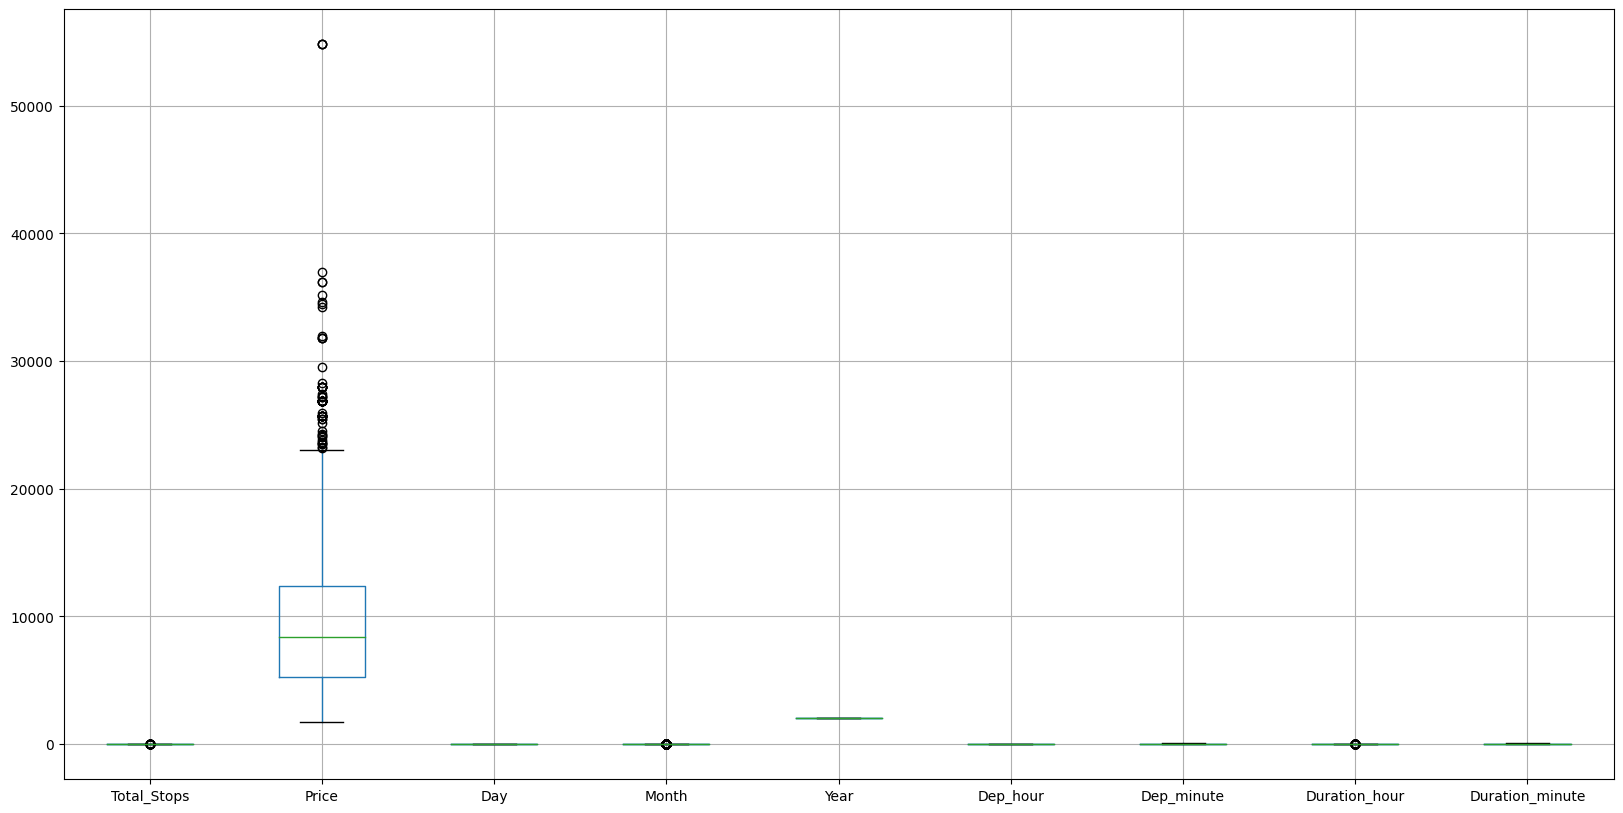

In [76]:
data.boxplot(figsize=(20,10))

In [77]:
data[data.Price>40000]

Airline  Total_Stops  Price  Day  Month  Year  Dep_hour  Dep_minute  \
1478  Jet Airways            1  54826   18      3  2019        18          40   
2618  Jet Airways            1  54826   18      3  2019        22          50   
5439  Jet Airways            1  54826    3      1  2019        16          55   

      Duration_hour  Duration_minute  
1478              6                5  
2618              6               15  
5439              6                5

In [78]:
data.drop([1478,2618,5439],axis=0,inplace=True)

In [79]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [80]:
data[data.duplicated()]

Airline  Total_Stops  Price  Day  Month  Year  Dep_hour  \
683    Jet Airways            2  13376    6      1  2019        14   
1061     Air India            2  10231   21      5  2019        22   
1348     Air India            2  12392   18      5  2019        17   
1418   Jet Airways            2  10368    6      6  2019         5   
1674        IndiGo            0   7303   24      3  2019        18   
...            ...          ...    ...  ...    ...   ...       ...   
10594  Jet Airways            2  12819   27      6  2019        23   
10616  Jet Airways            2  13014    6      1  2019         9   
10634  Jet Airways            2  11733    6      6  2019         9   
10672  Jet Airways            2  11150   27      6  2019        23   
10673  Jet Airways            2  16704   27      5  2019        13   

       Dep_minute  Duration_hour  Duration_minute  
683            35             13               50  
1061            0             21               15  
1348           15             26                0  
1418           30             22               55  
1674           25              2               55  
...           ...            ...              ...  
10594           5             13               30  
10616          40             26               55  
10634          40             26               55  
10672           5             19               55  
10673          25             15                0  

[222 rows x 10 columns]

In [81]:
data.drop_duplicates(inplace=True)

In [82]:
data

Airline  Total_Stops  Price  Day  Month  Year  Dep_hour  \
0           IndiGo            0   3897   24      3  2019        22   
1        Air India            2   7662    5      1  2019         5   
2      Jet Airways            2  13882    6      9  2019         9   
3           IndiGo            1   6218    5     12  2019        18   
4           IndiGo            1  13302    3      1  2019        16   
...            ...          ...    ...  ...    ...   ...       ...   
10678     Air Asia            0   4107    4      9  2019        19   
10679    Air India            0   4145   27      4  2019        20   
10680  Jet Airways            0   7229   27      4  2019         8   
10681      Vistara            0  12648    3      1  2019        11   
10682    Air India            2  11753    5      9  2019        10   

       Dep_minute  Duration_hour  Duration_minute  
0              20              2               50  
1              50              7               25  
2              25             19                0  
3               5              5               25  
4              50              4               45  
...           ...            ...              ...  
10678          55              2               30  
10679          45              2               35  
10680          20              3                0  
10681          30              2               40  
10682          55              8               20  

[10402 rows x 10 columns]

In [83]:
data[data.Duration_hour<2]   #No anomalies found

Airline  Total_Stops  Price  Day  Month  Year  Dep_hour  \
67       Air India            0   3625    5      6  2019        13   
70     Jet Airways            0   5678    6      1  2019         7   
77          IndiGo            0   4049    4      3  2019         6   
98     Jet Airways            0   8040   18      6  2019         7   
121      Air India            0   3100    5      3  2019        15   
...            ...          ...    ...  ...    ...   ...       ...   
10611  Jet Airways            0   4050   18      5  2019         7   
10617       IndiGo            0   2754   27      5  2019         2   
10655  Jet Airways            0   5678    5      3  2019         2   
10671    Air India            0   3100    6      6  2019        21   
10675    Air India            0   3100    6      9  2019         6   

       Dep_minute  Duration_hour  Duration_minute  
67             55              1               30  
70              5              1               25  
77             25              1               30  
98              5              1               25  
121             0              1               25  
...           ...            ...              ...  
10611           5              1               25  
10617          35              1               30  
10655          55              1               25  
10671           5              1               20  
10675          20              1               20  

[621 rows x 10 columns]

In [84]:
airline=data[["Airline"]]
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Multiple carriers  Airline_SpiceJet  Airline_Vistara  
0                          0                 0                0  
1                          0                 0                0  
2                          0                 0                0  
3                          0                 0                0  
4                          0                 0                0

In [85]:
data['Air_India']= airline['Airline_Air India']

In [86]:
data['GoAir']= airline['Airline_GoAir']

In [87]:
data['Indigo']= airline['Airline_IndiGo']
data['Jet_airways']= airline['Airline_Jet Airways']
data['Multiple_carriers']= airline['Airline_Multiple carriers']
data['SpiceJet']= airline['Airline_SpiceJet']
data['Vistara']= airline['Airline_Vistara']

In [88]:
data

Airline  Total_Stops  Price  Day  Month  Year  Dep_hour  \
0           IndiGo            0   3897   24      3  2019        22   
1        Air India            2   7662    5      1  2019         5   
2      Jet Airways            2  13882    6      9  2019         9   
3           IndiGo            1   6218    5     12  2019        18   
4           IndiGo            1  13302    3      1  2019        16   
...            ...          ...    ...  ...    ...   ...       ...   
10678     Air Asia            0   4107    4      9  2019        19   
10679    Air India            0   4145   27      4  2019        20   
10680  Jet Airways            0   7229   27      4  2019         8   
10681      Vistara            0  12648    3      1  2019        11   
10682    Air India            2  11753    5      9  2019        10   

       Dep_minute  Duration_hour  Duration_minute  Air_India  GoAir  Indigo  \
0              20              2               50          0      0       1   
1              50              7               25          1      0       0   
2              25             19                0          0      0       0   
3               5              5               25          0      0       1   
4              50              4               45          0      0       1   
...           ...            ...              ...        ...    ...     ...   
10678          55              2               30          0      0       0   
10679          45              2               35          1      0       0   
10680          20              3                0          0      0       0   
10681          30              2               40          0      0       0   
10682          55              8               20          1      0       0   

       Jet_airways  Multiple_carriers  SpiceJet  Vistara  
0                0                  0         0        0  
1                0                  0         0        0  
2                1                  0         0        0  
3                0                  0         0        0  
4                0                  0         0        0  
...            ...                ...       ...      ...  
10678            0                  0         0        0  
10679            0                  0         0        0  
10680            1                  0         0        0  
10681            0                  0         0        1  
10682            0                  0         0        0  

[10402 rows x 17 columns]

In [89]:
data.drop('Year',axis=1,inplace=True)

In [90]:
data_LR = data.drop('Airline',axis=1)

In [91]:
data_LR.head(1)

Total_Stops  Price  Day  Month  Dep_hour  Dep_minute  Duration_hour  \
0            0   3897   24      3        22          20              2   

   Duration_minute  Air_India  GoAir  Indigo  Jet_airways  Multiple_carriers  \
0               50          0      0       1            0                  0   

   SpiceJet  Vistara  
0         0        0

In [92]:
x = data_LR.drop('Price',axis=1)
y = data_LR.Price

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=5)

In [94]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [95]:
lr.fit(x_train,y_train)

LinearRegression()

In [96]:
lr.score(x_train,y_train)

0.5754831228637662

In [97]:
lr.score(x_test,y_test)

0.5897932732757322

In [98]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [99]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [100]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2832.4024
- Mean Absolute Error: 2015.0359
- R2 Score: 0.5755
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2759.9726
- Mean Absolute Error: 1983.0208
- R2 Score: 0.5898


Lasso
Model performance for Training set
- Root Mean Squared Error: 2832.5097
- Mean Absolute Error: 2014.2805
- R2 Score: 0.5755
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2760.4219
- Mean Absolute Error: 1983.1097
- R2 Score: 0.5897


Ridge
Model performance for Training set
- Root Mean Squared Error: 2832.4142
- Mean Absolute Error: 2014.7835
- R2 Score: 0.5755
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2760.0638
- Mean Absolute Error: 1983.0444
- R2 Score: 0.5898


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2253.1839
- Mean Absolute Error: 1518.0005


In [102]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [103]:
rf_model.best_params_

{'n_estimators': 220,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [104]:
#predicting the values
pred=rf_model.predict(x_test)
r2_score(y_test,pred)

0.8171642411407856

In [105]:
#predicting the values
pred=rf_model.predict(x_train)
r2_score(y_train,pred)

0.9211546709262439

In [106]:

rf_final=RandomForestRegressor(n_estimators= 200,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth=15)

In [107]:
rf_final.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=15, max_features='auto', min_samples_leaf=2,
                      n_estimators=200)

In [108]:
#predicting the values
pred=rf_final.predict(x_test)
r2_score(y_test,pred)

0.8187751108360685

In [109]:
#predicting the values
pred=rf_model.predict(x_train)
r2_score(y_train,pred)

0.9211546709262439

In [110]:
from sklearn.model_selection import GridSearchCV
random_search = {'n_estimators' : [120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20,25],
                 'min_samples_split' : [2, 5, 10, 15,50,100],
                 'min_samples_leaf' : [1, 2, 5, 10]
                }
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50,
                                                              100],
                                        'n_estimators': [120, 150, 180, 200,
                                                         220, 250]},
                   random_state=0, verbose=2)

In [111]:
rf_model.best_params_

{'n_estimators': 250,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [112]:
rf_final=RandomForestRegressor(n_estimators= 250,
 min_samples_split= 15,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 15)
rf_final.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=15, max_features='auto', min_samples_split=15,
                      n_estimators=250)

In [113]:
#predicting the values
pred=rf_final.predict(x_test)
r2_score(y_test,pred)

0.8261515923250642

In [114]:
#predicting the values
pred=rf_model.predict(x_train)
r2_score(y_train,pred)

0.8898587665141463